Model berhasil dimuat dari best_robust_model.h5
Label encoders berhasil dimuat
Ditemukan 11 gambar untuk diuji.

Memproses gambar: baju_cewek.jpg
1/1 [==============================] - 0s 236ms/step
Gender: Women (confidence: 56.19%)
Usage: Casual (confidence: 99.29%)
Article: Tops (confidence: 51.87%)
Hasil prediksi disimpan ke prediction_baju_cewek.png


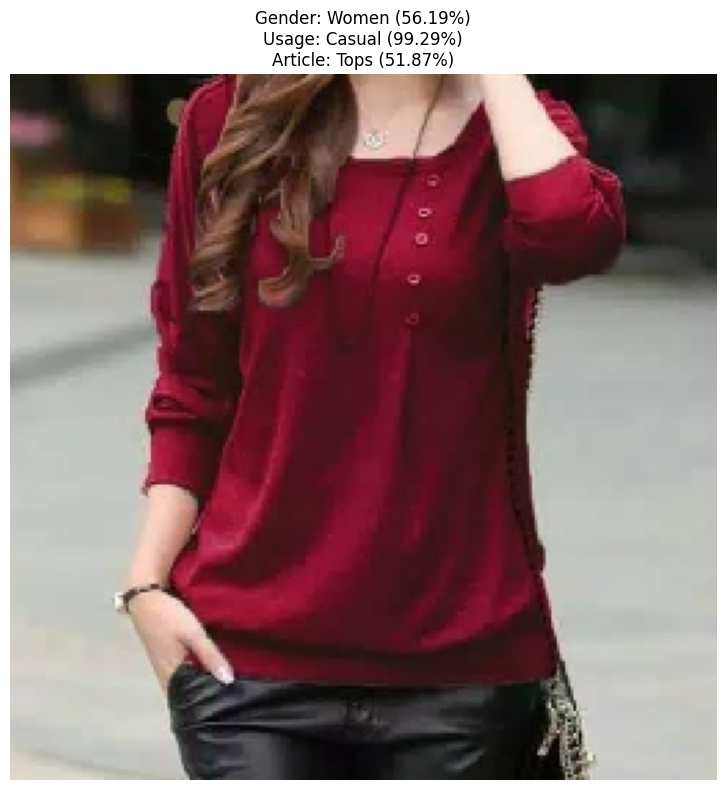


Memproses gambar: baju_cowok.jpg
1/1 [==============================] - 0s 11ms/step
Gender: Men (confidence: 98.56%)
Usage: Casual (confidence: 99.97%)
Article: Tshirts (confidence: 53.35%)
Hasil prediksi disimpan ke prediction_baju_cowok.png


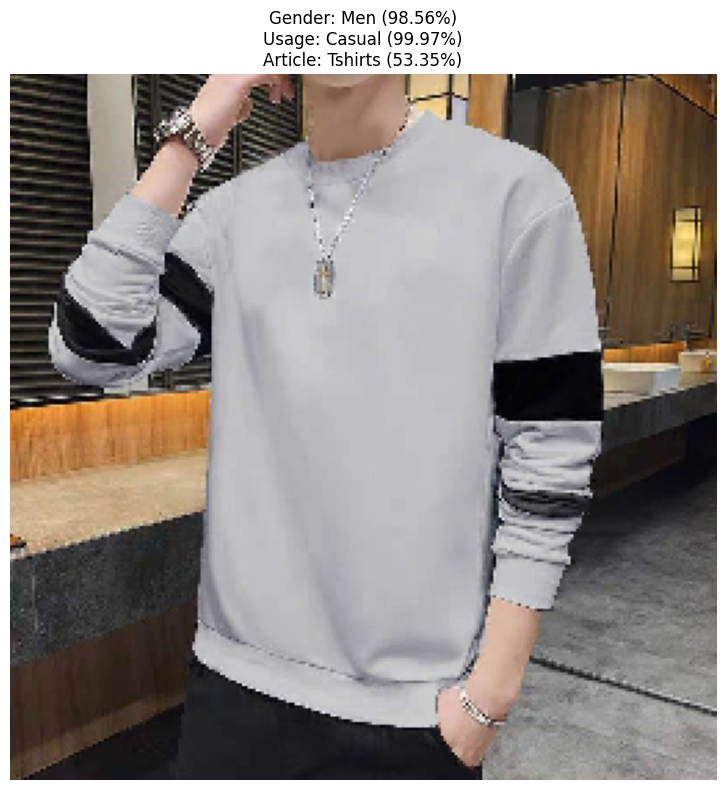


Memproses gambar: baju_piyau.jpg
1/1 [==============================] - 0s 24ms/step
Gender: Women (confidence: 60.55%)
Usage: Casual (confidence: 99.51%)
Article: Shirts (confidence: 54.88%)
Hasil prediksi disimpan ke prediction_baju_piyau.png


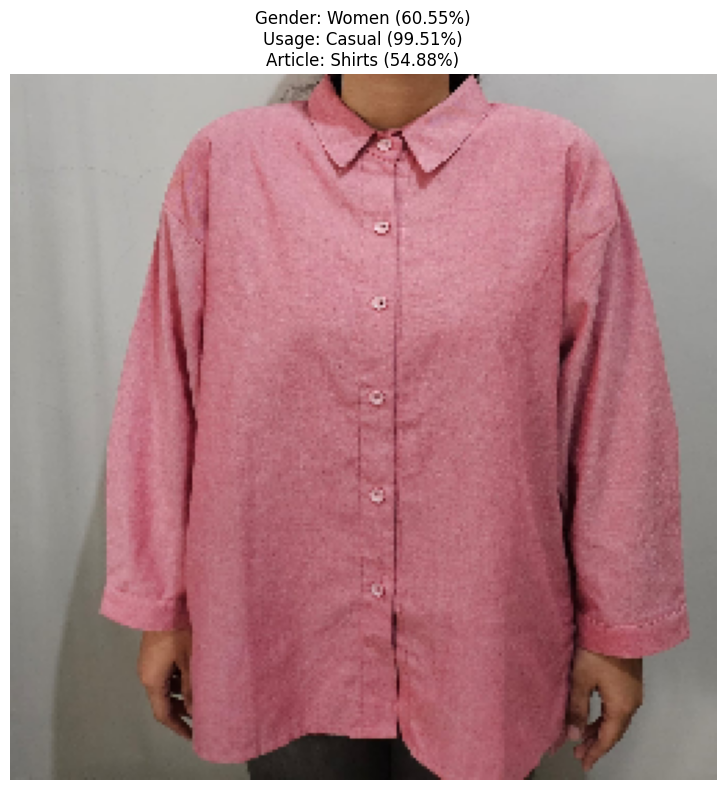


Memproses gambar: fashion_baju_cowok_at_twenty_s_1616989601_177061a8.jpg
1/1 [==============================] - 0s 21ms/step
Gender: Men (confidence: 99.38%)
Usage: Casual (confidence: 99.56%)
Article: Shirts (confidence: 88.77%)
Hasil prediksi disimpan ke prediction_fashion_baju_cowok_at_twenty_s_1616989601_177061a8.png


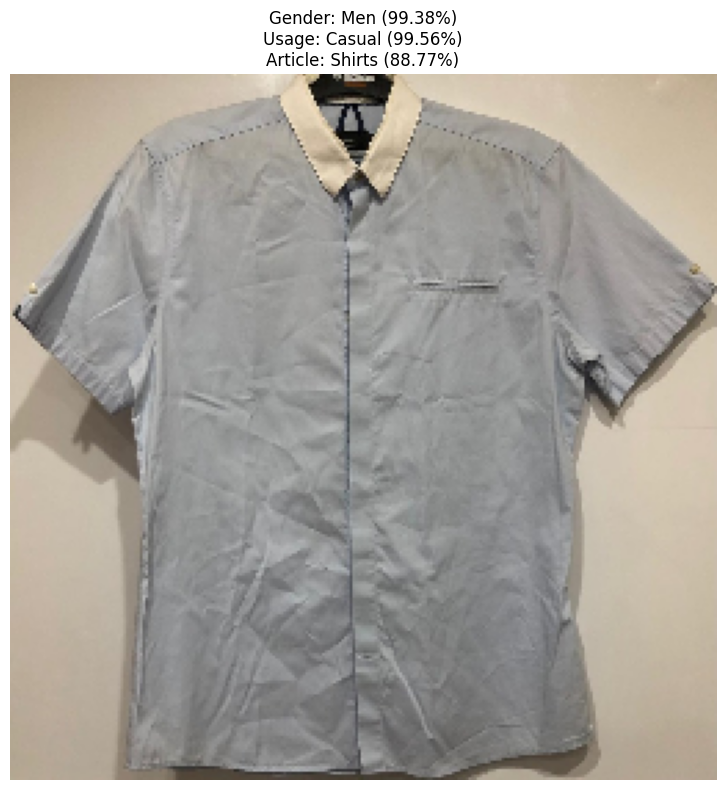


Memproses gambar: handbags.jpg
1/1 [==============================] - 0s 20ms/step
Gender: Women (confidence: 99.95%)
Usage: Casual (confidence: 99.86%)
Article: Handbags (confidence: 99.88%)
Hasil prediksi disimpan ke prediction_handbags.png


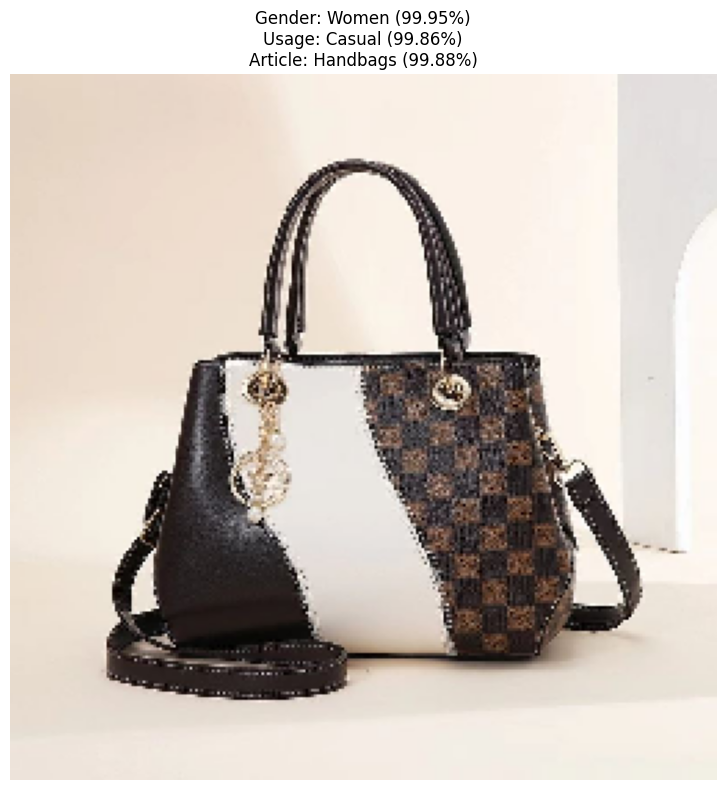


Memproses gambar: Jam_cowok.jpg
1/1 [==============================] - 0s 21ms/step
Gender: Men (confidence: 99.99%)
Usage: Casual (confidence: 99.51%)
Article: Watches (confidence: 90.41%)
Hasil prediksi disimpan ke prediction_Jam_cowok.png


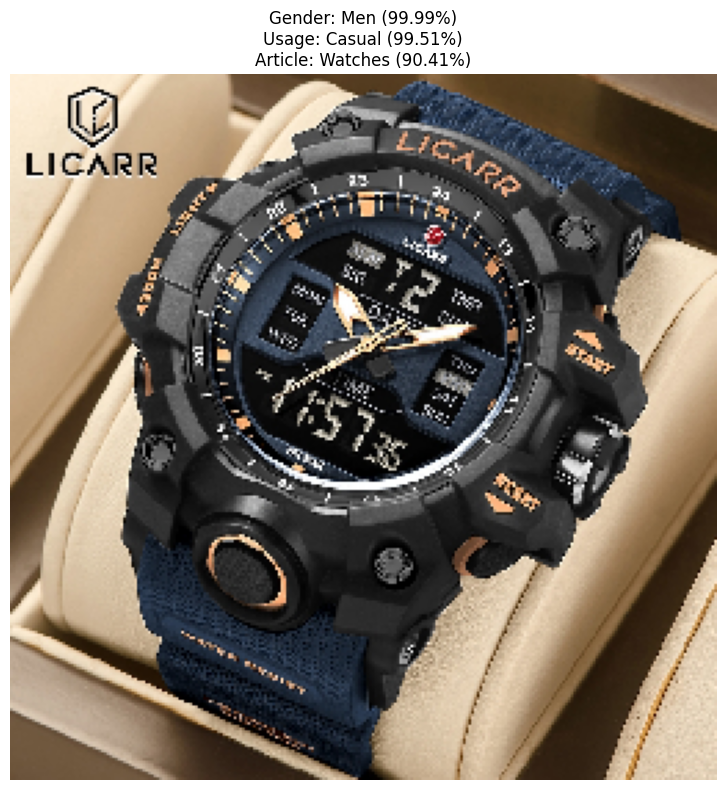


Memproses gambar: kurtas_cewek.jpg
1/1 [==============================] - 0s 19ms/step
Gender: Women (confidence: 97.41%)
Usage: Ethnic (confidence: 92.19%)
Article: Kurtas (confidence: 87.21%)
Hasil prediksi disimpan ke prediction_kurtas_cewek.png


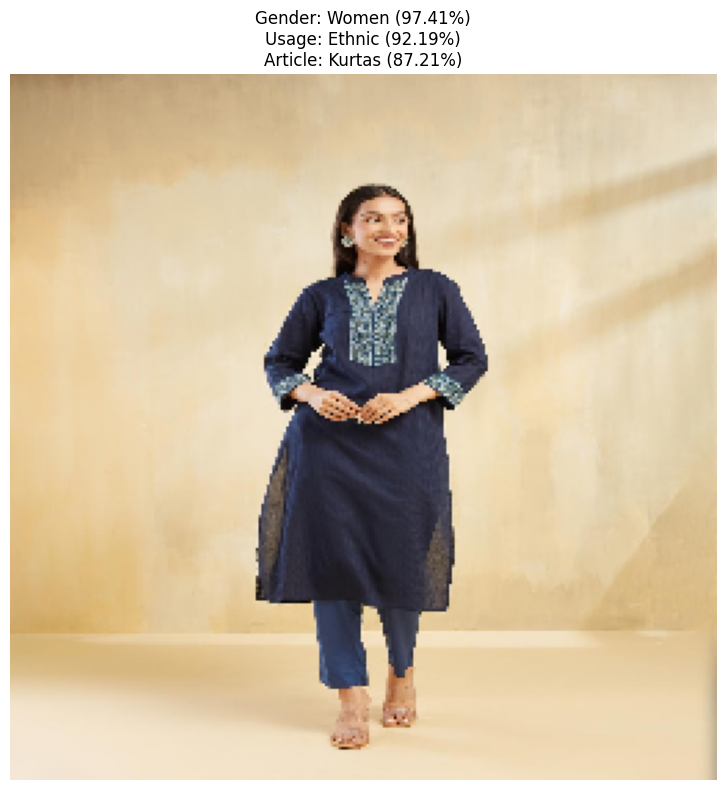


Memproses gambar: sport_shoes.jpg
1/1 [==============================] - 0s 16ms/step
Gender: Men (confidence: 88.90%)
Usage: Sports (confidence: 68.36%)
Article: Sports Shoes (confidence: 71.11%)
Hasil prediksi disimpan ke prediction_sport_shoes.png


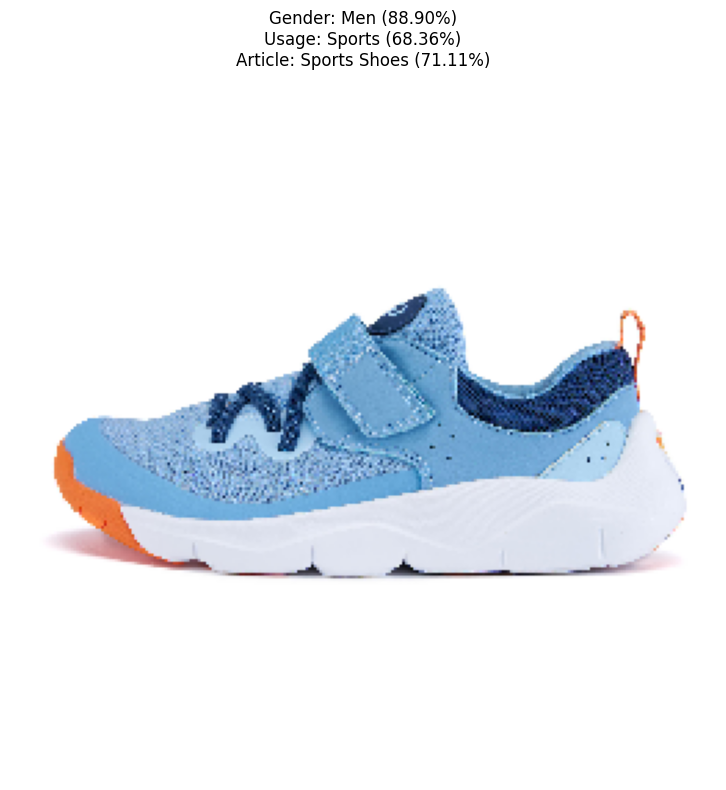


Memproses gambar: sweater.jpg
1/1 [==============================] - 0s 31ms/step
Gender: Men (confidence: 99.93%)
Usage: Casual (confidence: 98.82%)
Article: Tshirts (confidence: 89.17%)
Hasil prediksi disimpan ke prediction_sweater.png


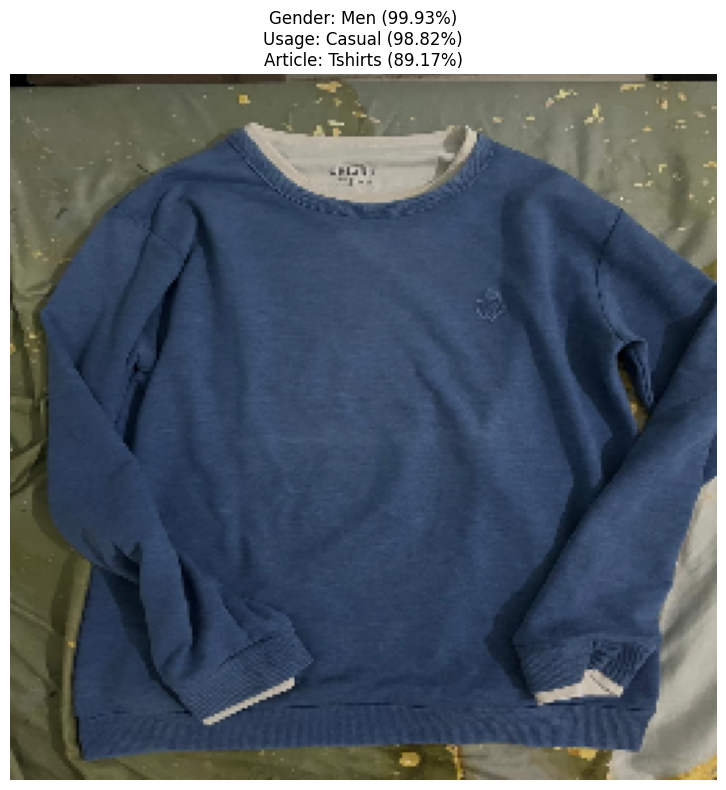


Memproses gambar: tas_fira.jpg
1/1 [==============================] - 0s 18ms/step
Gender: Women (confidence: 99.73%)
Usage: Casual (confidence: 99.94%)
Article: Handbags (confidence: 99.59%)
Hasil prediksi disimpan ke prediction_tas_fira.png


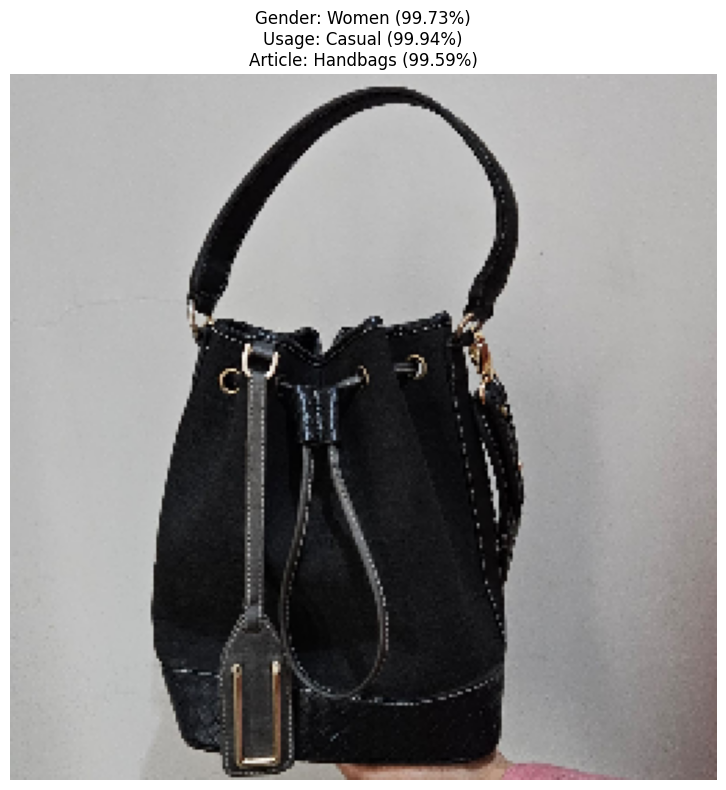


Memproses gambar: woman_heels.jpg
1/1 [==============================] - 0s 21ms/step
Gender: Women (confidence: 99.78%)
Usage: Casual (confidence: 99.71%)
Article: Heels (confidence: 99.91%)
Hasil prediksi disimpan ke prediction_woman_heels.png


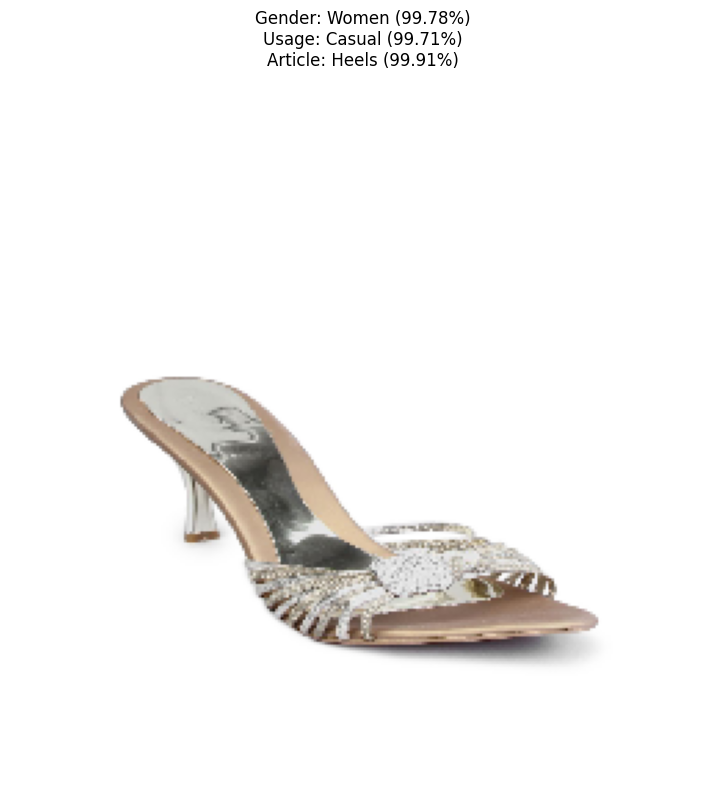

In [4]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
import cv2
import glob

# Path settings
model_path = 'best_robust_model.h5'
le_gender_path = 'le_gender.pkl'
le_usage_path = 'le_usage.pkl'
le_article_path = 'le_article.pkl'
test_images_path = "../real_world_test"

# Load model
try:
    model = load_model(model_path)
    print(f"Model berhasil dimuat dari {model_path}")
except Exception as e:
    print(f"Error loading model: {e}")
    exit(1)

# Load label encoders
try:
    with open(le_gender_path, 'rb') as f:
        le_gender = pickle.load(f)
    with open(le_usage_path, 'rb') as f:
        le_usage = pickle.load(f)
    with open(le_article_path, 'rb') as f:
        le_article = pickle.load(f)
    print("Label encoders berhasil dimuat")
except Exception as e:
    print(f"Error loading label encoders: {e}")
    exit(1)

def preprocess_image(img_path, target_size=(256, 256)):
    """
    Preprocess image for model prediction
    """
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    
    # Normalisasi gambar
    img_array = img_array / 255.0
    
    # Standarisasi dengan mean dan std
    img_array = (img_array - np.mean(img_array)) / (np.std(img_array) + 1e-7)
    
    # Expand dimensions for batch
    img_array = np.expand_dims(img_array, axis=0)
    
    return img_array, img

def predict_fashion_item(model, img_path, le_gender, le_usage, le_article):
    """
    Predict fashion item attributes using the loaded model
    """
    # Preprocess image
    img_preprocessed, original_img = preprocess_image(img_path)
    
    # Predict
    predictions = model.predict(img_preprocessed)
    
    # Get predicted classes
    gender_pred = le_gender.classes_[np.argmax(predictions[0][0])]
    usage_pred = le_usage.classes_[np.argmax(predictions[1][0])]
    article_pred = le_article.classes_[np.argmax(predictions[2][0])]
    
    # Get confidence scores
    gender_conf = np.max(predictions[0][0]) * 100
    usage_conf = np.max(predictions[1][0]) * 100
    article_conf = np.max(predictions[2][0]) * 100
    
    return {
        'gender': gender_pred,
        'gender_conf': gender_conf,
        'usage': usage_pred,
        'usage_conf': usage_conf,
        'article': article_pred,
        'article_conf': article_conf,
        'original_img': original_img
    }

# Fungsi untuk menampilkan gambar dengan hasil prediksi
def display_prediction(img_path, predictions):
    plt.figure(figsize=(12, 8))
    
    # Display image with predictions
    plt.imshow(predictions['original_img'])
    plt.axis('off')
    
    # Add title with predictions
    title = f"Gender: {predictions['gender']} ({predictions['gender_conf']:.2f}%)\n"
    title += f"Usage: {predictions['usage']} ({predictions['usage_conf']:.2f}%)\n"
    title += f"Article: {predictions['article']} ({predictions['article_conf']:.2f}%)"
    
    plt.title(title)
    plt.tight_layout()
    
    # Extract filename without extension for the saved image name
    base_filename = os.path.basename(img_path)
    filename_no_ext = os.path.splitext(base_filename)[0]
    
    # Save the result
    output_path = f"prediction_{filename_no_ext}.png"
    plt.savefig(output_path)
    print(f"Hasil prediksi disimpan ke {output_path}")
    
    plt.show()

# Main execution
def main():
    # Get all image files from the test directory
    image_extensions = ['*.jpg', '*.jpeg', '*.png', '*.bmp']
    image_files = []
    
    for ext in image_extensions:
        image_files.extend(glob.glob(os.path.join(test_images_path, ext)))
    
    if not image_files:
        print(f"Tidak ada gambar yang ditemukan di {test_images_path}")
        return
    
    print(f"Ditemukan {len(image_files)} gambar untuk diuji.")
    
    # Process each image
    for img_path in image_files:
        print(f"\nMemproses gambar: {os.path.basename(img_path)}")
        
        try:
            # Predict
            predictions = predict_fashion_item(model, img_path, le_gender, le_usage, le_article)
            
            # Display results
            print(f"Gender: {predictions['gender']} (confidence: {predictions['gender_conf']:.2f}%)")
            print(f"Usage: {predictions['usage']} (confidence: {predictions['usage_conf']:.2f}%)")
            print(f"Article: {predictions['article']} (confidence: {predictions['article_conf']:.2f}%)")
            
            # Display and save image with predictions
            display_prediction(img_path, predictions)
            
        except Exception as e:
            print(f"Error saat memproses {img_path}: {e}")

if __name__ == "__main__":
    main()